In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset')
# #{"username":"asifhassan2002","key":"asifhassan2002"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asifhassan2002
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:02<00:00, 71.2MB/s]


*Source :* https://mathphysicsfunwithgus.square.site/

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/Brain Tumor Classification and Segmentation/Multiclass Tumor

/content/drive/MyDrive/Colab Notebooks/Brain Tumor Classification and Segmentation/Multiclass Tumor


<a name='T'>

<div style="background-color: #0EEAF1;
            padding: 20px;
            border-radius: 10px;
            text-align: center;
            color: black;
            font-family: 'computermodern';
            border: 1.5px solid black;">
    <h1 style="font-size: 500%; margin-bottom: 25px;">Multi-Class MRI Brain Tumor Classification</h1>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/1608934/2645886/44583c7826d1bdea68598f0eef8e6cfc/dataset-cover.jpg?t=2021-09-25-22-03-08" style="width: 50%; margin: 0 auto; display: block; border-radius: 10px; box-shadow: 5px 5px 30px #333; margin-bottom: 0px;">


# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 30px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); text-align: center; margin-bottom: -25px;">1 | About The Data 🧠</div>
   
    
## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: -10px;">1.1 | TensorFlow 𝟸.𝟷𝟼 Features </div>
    
In this notebook, we will also delve into TensorFlow 2.16, which introduces several enhancements and features that streamline the model development process. TensorFlow 2.16 includes improved data augmentation capabilities, advanced model-building APIs, and optimized performance for faster computation and training. These features will be leveraged to demonstrate how state-of-the-art machine learning techniques can be applied to the critical field of medical imaging, potentially leading to breakthroughs in the early detection and classification of brain tumors.
    
## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: -10px"> 1.2 | Understanding Brain Tumors and Detection Methods </div>
    
A brain tumor represents an abnormal mass or growth of cells in the brain, existing within the confined space of the skull. This condition can lead to serious complications due to increased intracranial pressure and potential brain damage. Tumors can be benign (noncancerous) or malignant (cancerous), and their early detection and accurate classification are critical for effective treatment planning, underscoring the importance of advancements in medical imaging.

Deep learning, particularly in the realm of healthcare, has brought significant improvements in diagnosing various conditions, including brain tumors. The World Health Organization emphasizes the importance of accurate brain tumor diagnosis, which includes detecting the presence of a tumor, pinpointing its location, and classifying its type and grade. This notebook explores the use of Convolutional Neural Networks (CNNs) in a multi-task approach for the detection, classification, and location identification of brain tumors using MRI images, showcasing the potential of these models to revolutionize diagnostics in neurology.

## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">1.3 | About the Data Set <b>
This dataset is a compilation of three primary datasets: figshare, Br35H, and a removed source due to bad data. The dataset comprises a total of `7023` human **brain MRI images**, categorized into four distinct classes. The dataset focuses on brain tumors and their classification. The four classes are as follows:

- **Glioma**: Cancerous brain tumors in glial cells.
- **Meningioma**: Non-cancerous tumors originating from the meninges.
- **No Tumor**: Normal brain scans without detectable tumors.
- **Pituitary**: Tumors affecting the pituitary gland, which can be cancerous or non-cancerous.

Advancing the development of machine learning models for tumor classification is crucial for driving progress in the field of neurology and making a significant impact on the lives of individuals. These models have the potential to enhance medical research, improve diagnostic accuracy, and contribute to effective treatment strategies for various types of tumors. By leveraging machine learning techniques, we can significantly aid in the advancement of neurology and ultimately improve healthcare outcomes for people affected by tumors.
    
The "No Tumor" class images were obtained from the `Br35H dataset`.

The data link and complete description here [`Brain Tumor Data on Kaggle`](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)
    
 <a name='imports'>
    
# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 25px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); text-align: center; margin-bottom: -10px;">2 | Imports and Setup 📚</div>

In [5]:
# General Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Neural Network imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# Image augmentation importrs
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomContrast
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomTranslation

# Training Model callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

'''
# Check if GPU is available
print(f'Tensorflow Version: {tf.__version__}')
print("GPU Available:", tf.config.list_physical_devices('GPU')[0])
'''

SEED = 42

# Data Visualization updates
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams.update({'font.size': 14})

<a name='import_data'>

# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 25px; text-align: center; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: -15px;">3 | Data Processing 👨🏻‍💻</div>

In [6]:
# Function to get image paths and labels
def get_data_labels(directory, do_shuffle=True, random_state=SEED):
    data_path = []
    data_index = []

    label_dict = {label: index for index, label in enumerate(sorted(os.listdir(directory)))}

    for label, index in label_dict.items():
        label_dir = os.path.join(directory, label)
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_index.append(index)

    if do_shuffle:
        data_path, data_index = shuffle(data_path, data_index, random_state=random_state)

    return data_path, data_index


# Function to preprocess image and label
def parse_function(filename, label, image_size, n_channels):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=n_channels)
    image_resized = tf.image.resize(image_decoded, image_size)
    return image_resized, label


# Function to create a TensorFlow dataset
def get_dataset(paths, labels, image_size, n_channels=1, num_classes=4, batch_size=32):
    path_ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    image_label_ds = path_ds.map(lambda path, label: parse_function(path, label, image_size, n_channels),
                                 num_parallel_calls=tf.data.AUTOTUNE)

    return image_label_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


In [7]:
# Getting data labels
train_paths, train_index = get_data_labels('/content/brain-tumor-mri-dataset/Training')
test_paths, test_index = get_data_labels('/content/brain-tumor-mri-dataset/Testing')

# Printing traing and testing sample sizes
print('Training')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_index)}')
print('\nTesting')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_index)}')

# Prepare datasets with 4 classes and grayscale
batch_size = 32
image_size =(256, 256)
train_ds = get_dataset(train_paths,
                       train_index,
                       image_size,
                       n_channels=1,
                       num_classes=4 ,
                       batch_size=batch_size)

test_ds = get_dataset(test_paths, test_index, image_size, n_channels=1, num_classes=4, batch_size=batch_size)

# Output to show datasets
print(f"\nTraining dataset: {train_ds}")
print(f"\nTesting dataset: {test_ds}")

# Class mappings
class_mappings = {'Glioma': 0, 'Meninigioma': 1, 'Notumor': 2, 'Pituitary': 3}
inv_class_mapping = {v: k for k, v in class_mappings.items()}
class_names = list(class_mappings.keys())

Training
Number of Paths: 5712
Number of Labels: 5712

Testing
Number of Paths: 1311
Number of Labels: 1311

Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Testing dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


<a name='vis'>
    
# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 25px; text-align: center; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);  margin-bottom: -10px;">4 | Data Visualization 📊 </div>

([<matplotlib.patches.Wedge at 0x796c03355450>,
 [Text(0.8353090363663647, 0.7309985046254851, 'Glioma'),
  Text(-0.6270109167074458, 0.9159461285084887, 'Meninigioma'),
  Text(-0.8915813437713616, -0.8031704099622031, 'Notumor'),
  Text(0.8353090363663648, -0.730998504625485, 'Pituitary')],
 [Text(0.45904370466980393, 0.40171989893832966, '22.88%\n300'),
  Text(-0.3445735668392269, 0.5033577823334937, '23.34%\n306'),
  Text(-0.5200891171999609, -0.4685160724779518, '30.89%\n405'),
  Text(0.459043704669804, -0.40171989893832954, '22.88%\n300')])

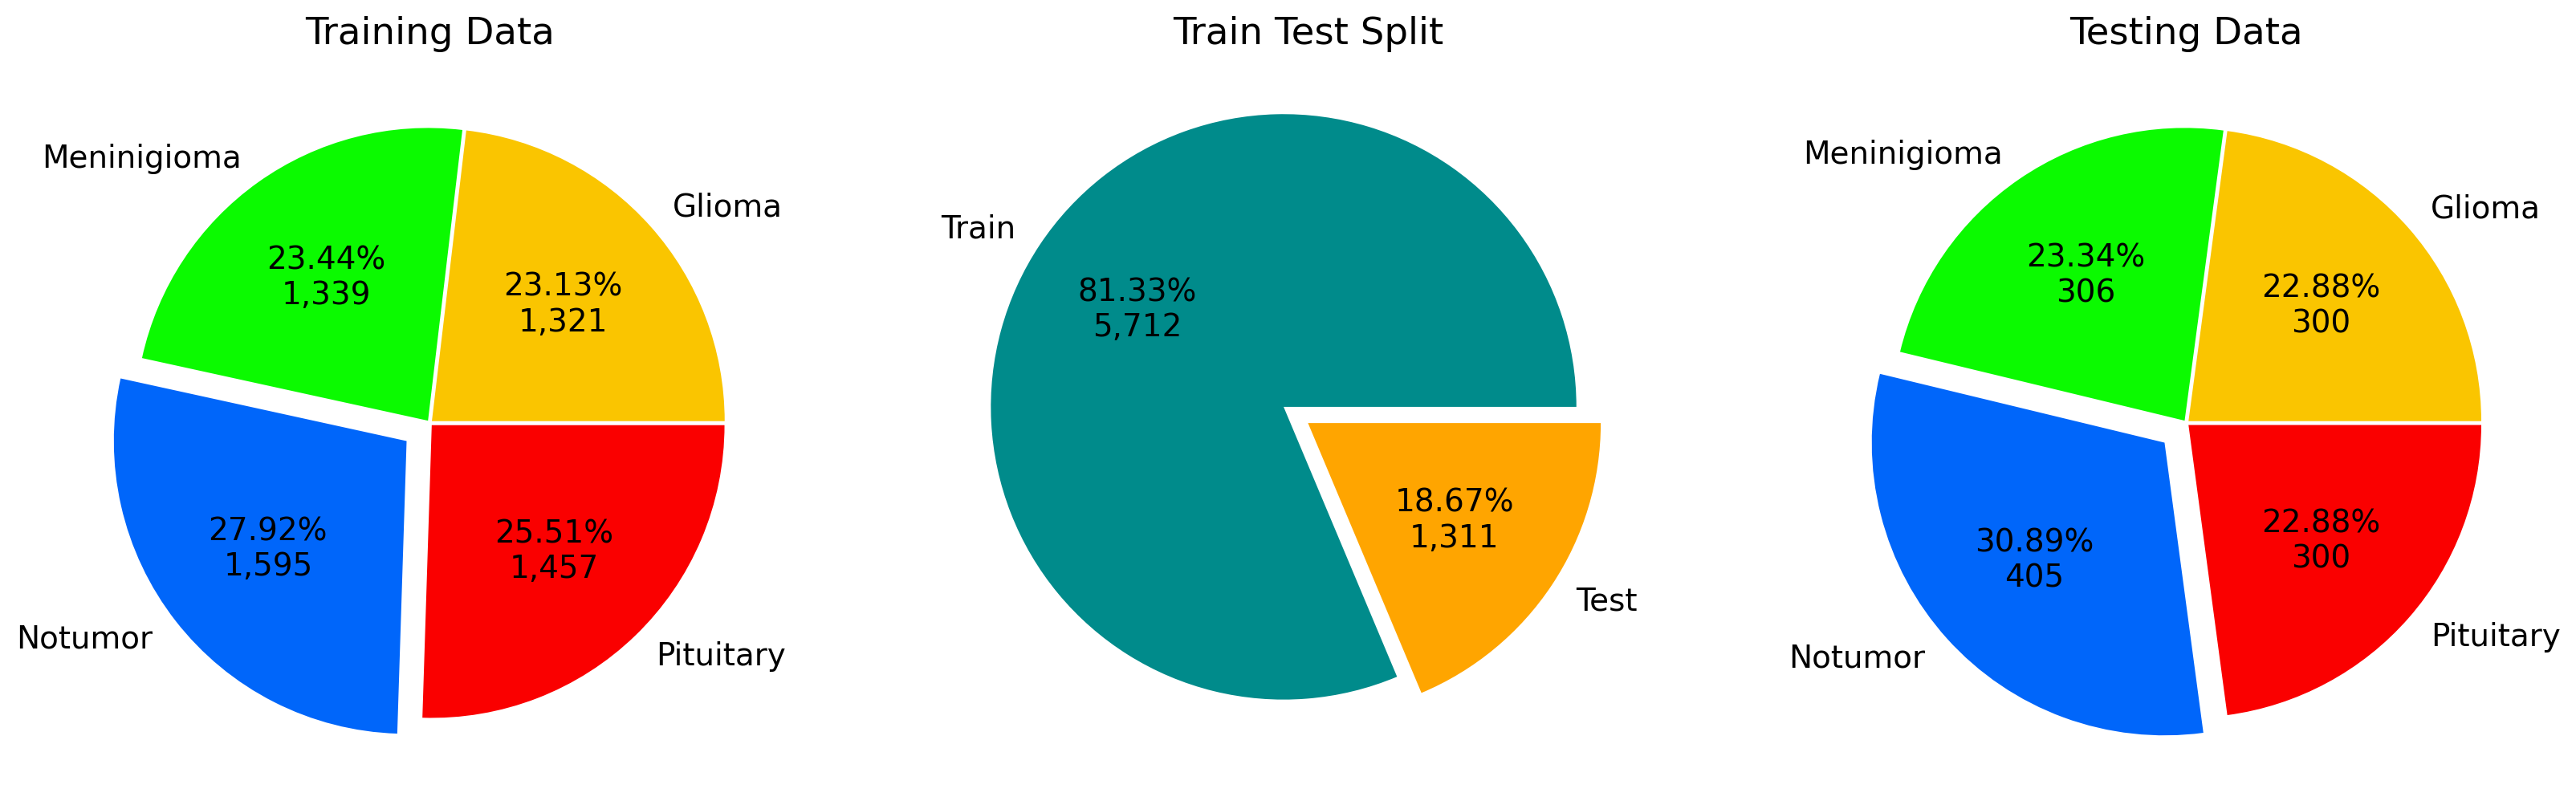

In [8]:
# Plotting training data types

class_counts = [len([x for x in train_index if x == label]) for label in set(train_index)]

plt.figure(figsize=(20, 14))

plt.subplot(1,3,1)
plt.title('Training Data')
plt.pie(
    class_counts,
    labels= [label for label in class_names],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'],
    explode=(0.01, 0.01, 0.1, 0.01),
    autopct = lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
)

# Plotting distribution of train test split
plt.subplot(1,3,2)
plt.title('Train Test Split')
plt.pie(
    [len(train_paths),len(test_paths)],
    labels = ['Train', 'Test'],
    colors=['darkcyan', 'orange'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum([len(train_index), len(test_index)]) / 100),
    explode=(0.1, 0),
    )

# Plotting testing data types
class_counts = [len([x for x in test_index if x == label]) for label in set(test_index)]
plt.subplot(1,3,3)
plt.title('Testing Data')
plt.pie(
    class_counts,
    labels=[label for label in class_names],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=(0.01, 0.01, 0.1, 0.01),
)

## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">4.1 | Viewing Image Data <b>
    

In [9]:
# Function to display a list of images based on the given index
import random
def show_image(paths, label_paths, num_img):

    fig, ax = plt.subplots(num_img, 4, figsize=(12,18))
    ax= ax.flatten()


    for i in range(num_img*4):
        index = random.randint(0, len(paths)-1)
        image = load_img(paths[index], target_size=(256,256))
        ax[i].imshow(image)
        label = label_paths[index]
        class_name = inv_class_mapping[label]
        ax[i].set_title(f'{index}: {class_name}')
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
show_image(train_paths, train_index, 5)

Output hidden; open in https://colab.research.google.com to view.


        
# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 25px; text-align: center; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);  margin-bottom: -10px;">5 | Training Setup 🏙️ </div>

In [11]:
# Data augmentation sequential Model

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.02, fill_mode='constant'),
    RandomContrast(0.1),
    RandomZoom(height_factor=0.01, width_factor=0.05),
    RandomTranslation(height_factor=0.0015, width_factor=0.0015, fill_mode='constant'),
])

# Training augmentation and nornalization
def preprocess_train(image, label):
  image = data_augmentation(image) / 255.0
  return image, label

# For test dataset only appying normalization
def preprocess_test(image, label):
  image = image / 255.0
  return image , label

train_ds_processed = train_ds.map(preprocess_train,num_parallel_calls=tf.data.AUTOTUNE)
test_ds_preprocessed = test_ds.map(preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)

## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">5.1 | Visualizing Augmentated Images <b>

In [12]:
# Function to display augmented images

def plot_augmented_images(dataset, shape):
    plt.figure(figsize=(15,6))
    for images, labels  in dataset.take(1): #  plot only one batch of augmented images from the dataset
        i= 0
        for i in range(shape[0]*shape[1]):
            ax = plt.subplot(shape[0],shape[1], i+1)
            plt.imshow(images.numpy()[i], cmap = 'gray')
            plt.title(inv_class_mapping[labels.numpy()[i]]) #ensorFlow tensors to a NumPy array for easier indexing
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


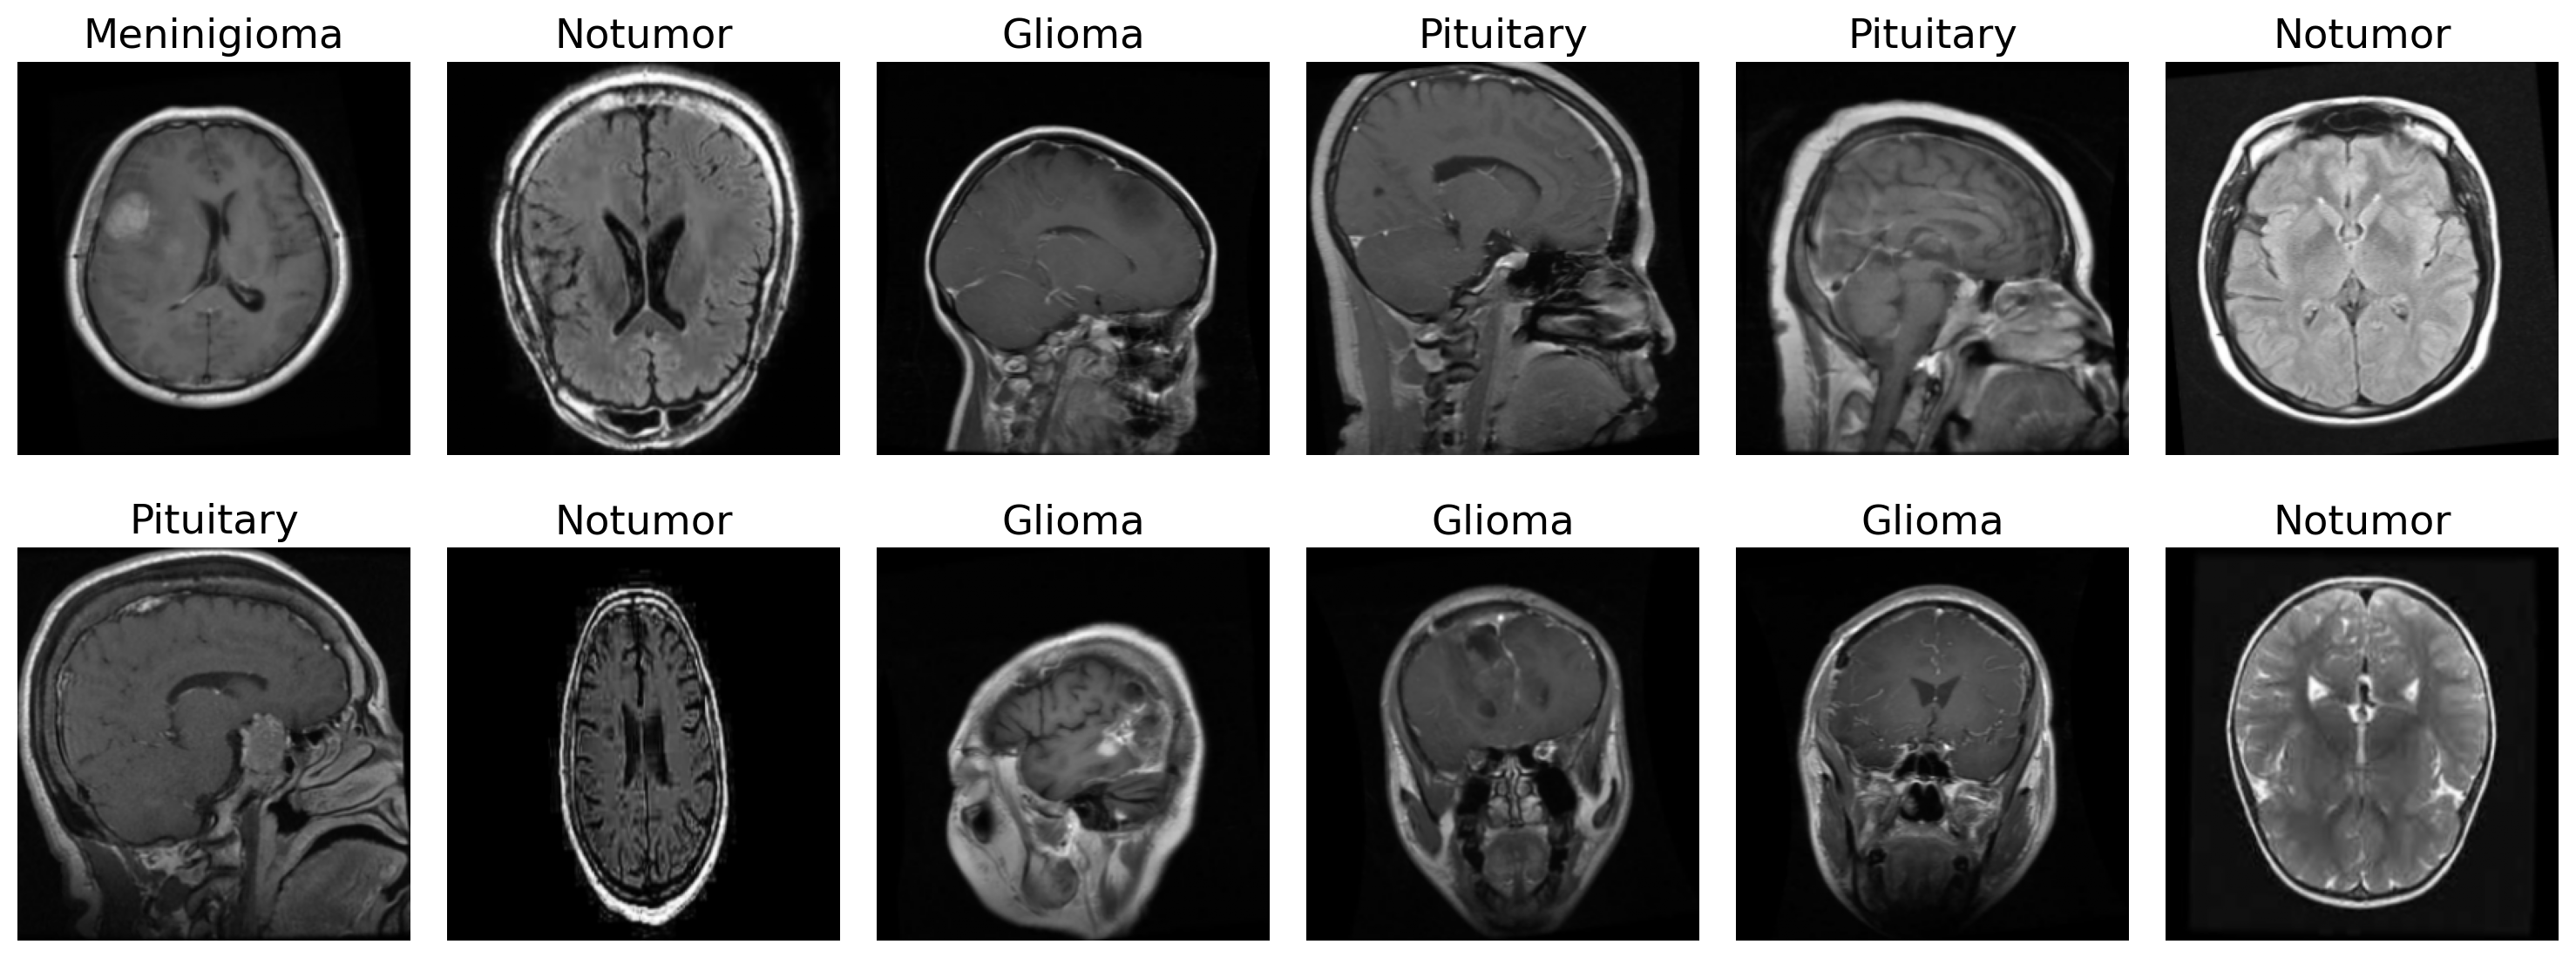

In [13]:
plot_augmented_images(train_ds_processed, shape=(2,6))

## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">5.2 | Training Setup <b>

In [14]:
# Classes and Image shape: height, width, grayscale
num_classes = len(class_mappings.keys())
image_shape = (image_size[0], image_size[1], 1)

# Training epochs and batch size
epochs = 50

print(f'Number of Classes: {num_classes}')
print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')

def encode_labels(image , label):
    return image , tf.one_hot(label, depth = num_classes)

train_ds_preprocessed  = train_ds_processed.map(encode_labels,num_parallel_calls=tf.data.AUTOTUNE)
test_ds_preprocessed = test_ds_preprocessed.map(encode_labels, num_parallel_calls=tf.data.AUTOTUNE)

Number of Classes: 4
Image shape: (256, 256, 1)
Epochs: 50
Batch size: 32


<a name='CNN2'>
    
# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 25px; text-align: center; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);  margin-bottom: -15px;">6 | Building CNN Model 🚊 </div>
    
### <div style="font-size: 90%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);"> 6.0.1 | Understanding Convolutional Layer (Conv2D) </div>
    
- **Filters**: Number of output filters in the convolution.
  - *Example*: 32 filters.
  - *Math*: Determines the depth of the output feature map.
  - *Intuition*: Captures a variety of features from the input.
- **Kernel Size**: Size of the convolution window.
  - *Example*: `(3, 3)` is a common kernel size.
  - *Math*: Defines the area of input considered during each convolution.
  - *Intuition*: Small kernels capture local features, while larger kernels capture more global features.
- **Strides**: Step size at which the convolution window moves across the input.
  - *Example*: `(1, 1)` means moving one pixel at a time.
  - *Math*: Affects the dimensionality of the output feature map.
  - *Intuition*: Larger strides can reduce spatial dimensions, capturing broader features.
- **Padding**: Adds zeros to the input's edges to maintain size.
  - *Example*: 'Same' padding retains the input size in the output.
  - *Math*: Influences the size of the output feature map.
  - *Intuition*: Ensures edge features are processed effectively.
- **Activation**: Non-linear function applied to introduce non-linearity.
  - *Example*: ReLU (Rectified Linear Unit).
  - *Math*: Applies non-linearity to the convolution output.
  - *Intuition*: Allows the network to learn complex patterns.

    
### <div style="font-size: 90%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);"> 6.0.2 | Understanding Pooling Layer (MaxPooling2D, AvgPooling2D) </div>
    
- **Pool Size**: The size of the pooling window.
  - *Example*: `(2, 2)` reduces the spatial dimensions by half.
  - *Math*: Downsamples the input representation.
  - *Intuition*: Makes the features more robust to variations and translations.
- **Strides** and **Padding**: Similar to convolutional layers, they influence the output size.
  - *Example*: Strides often equal the pool size to avoid overlap.


### <div style="font-size: 90%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">6.0.3 | Understanding Beta Parameters in Adam Optimizer and Weight Updates </div>

The Adam optimizer adapts the learning rate for each weight of the model by calculating the first and second moments of the gradients. Here's an in-depth look at how this works:

#### **Beta Parameters (beta_1 and beta_2)**
- **beta_1**: The exponential decay rate for the first moment (mean) of the gradients.
  - **Math**: $\hat{m}_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$
  - *where*: $m_t$ is the bias-corrected first moment estimate, $m_{t-1}$ is the first moment at the previous time step, and $g_t$ is the gradient at time step $t$.
  - **Intuition**: Controls the extent to which the optimizer relies on the previous gradients. A higher `beta_1` maintains a longer memory, leading to smoother updates, while a lower value makes the optimizer more responsive to recent changes.
- **beta_2**: The exponential decay rate for the second moment (variance) of the gradients.
  - **Math**: $\hat{v}_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$
  - *where*: $v_t$ is the bias-corrected second moment estimate, and $g_t^2$ is the square of the gradient at time step $t$.
  - **Intuition**: Determines how the optimizer adapts the learning rate based on the history of squared gradients. Higher `beta_2` values result in more stable but conservative updates, while lower values allow for more aggressive adjustments.

#### **Weight Update Equation**
The weight update in Adam is influenced by these moment estimates, guiding the amount of adjustment made to weights during each training iteration. The integrated update equation is:
$$ \theta_{t+1} = \theta_t - \frac{\eta \cdot \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $$
where:
- $\theta_{t+1}$ is the updated weight.
- $\theta_t$ is the current weight.
- $\eta$ is the learning rate.
- $\hat{m}_t$ is the bias-corrected first moment estimate.
- $\hat{v}_t$ is the bias-corrected second moment estimate.
- $\epsilon$ is a small constant (e.g., 1e-8) to prevent division by zero.

This equation demonstrates how the optimizer uses the first and second moment estimates to adaptively adjust the learning rate for each weight, helping to accelerate convergence and improve the training process's efficiency.



In [15]:
# Building model
model = Sequential([
    # Input tensor shape
    Input(shape=image_shape),

    # Convolutional layer 1
    Conv2D(64, (5, 5), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 2
    Conv2D(64, (5, 5), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 3
    Conv2D(128, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 4
    Conv2D(128, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),

    # Dense layers
    Dense(512, activation="relu"),
    Dense(num_classes, activation="softmax")
])

# Model summary
model.summary()

# COompilng model with Adam optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.85, beta_2=0.9925)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 64)        │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,548,740 (5.91 MB)

 Trainable params: 1,548,740 (5.91 MB)

 Non-trainable params: 0 (0.00 B)

## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">6.1 | CNN Training <b>
    
`ReduceLROnMultipleAccuracies Callback`: This TensorFlow callback reduces the learning rate when validation accuracy exceeds a set threshold. It's useful for fine-tuning and preventing overfitting by making smaller updates to the model's weights as it learns.
    

In [18]:
# Callbacks for improved covergence of gradient and best test accuracy
model_rlr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor=0.8,
    min_lr=1e-4,
    patience=4,
    verbose=1
)

model_mc = ModelCheckpoint(
    filepath = ' model.keras',
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only=True
)

In [19]:
# Training the model
history = model.fit(
    train_ds_preprocessed,
    epochs=epochs,
    validation_data=test_ds_preprocessed,
    callbacks=[model_rlr, model_mc],
    verbose=True
)

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.4708 - loss: 1.1326
Epoch 1: val_accuracy improved from -inf to 0.70328, saving model to  model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 370ms/step - accuracy: 0.4716 - loss: 1.1312 - val_accuracy: 0.7033 - val_loss: 0.7226 - learning_rate: 0.0010
Epoch 2/50
178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7822 - loss: 0.5432
Epoch 2: val_accuracy improved from 0.70328 to 0.77879, saving model to  model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 228ms/step - accuracy: 0.7824 - loss: 0.5427 - val_accuracy: 0.7788 - val_loss: 0.5574 - learning_rate: 0.0010
Epoch 3/50
178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8567 - loss: 0.3890
Epoch 3: val_accuracy improved from 0.77879 to 0.84821, saving model to  model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.8568 - loss: 0.3885 - val_accuracy: 0.8482 - val_loss: 0.3829 - learning_rate: 0.0010
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/ste

## <div style="font-size: 100%; background-color: cyan; color: black; border-radius: 12px; padding: 10px; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">6.2 | Model Evaluation <b>

In [20]:
# Loading saved model
model = load_model(' model.keras')

# Evaluate model and test data accuracy
test_loss, test_acc = model.evaluate(test_ds_preprocessed)
print(f"Test accuracy: {test_acc*100:0.4f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9877 - loss: 0.1450
Test accuracy: 99.0847%


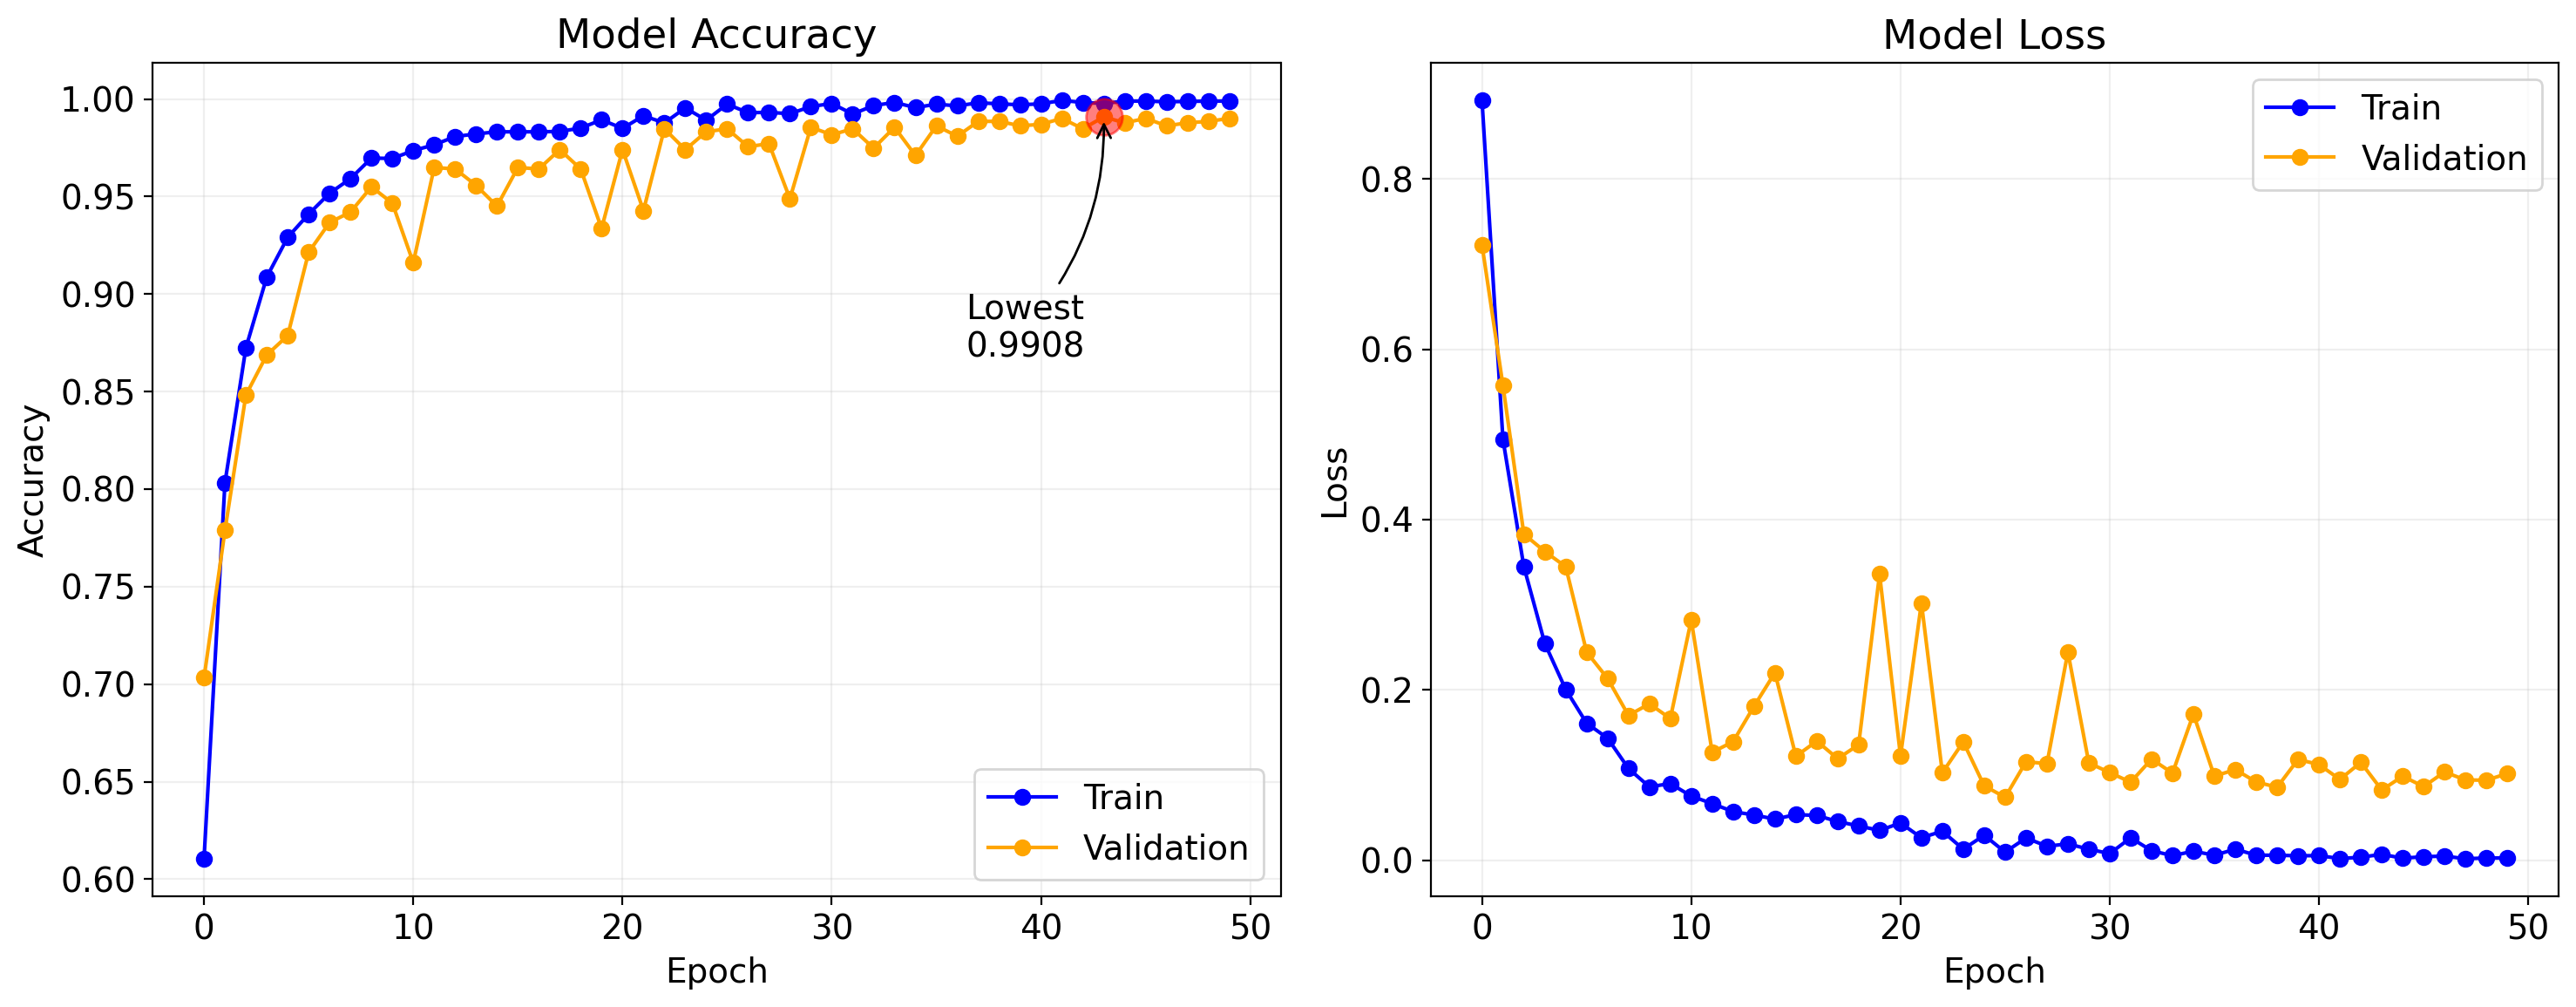

In [21]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plotting training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'], marker='o', linestyle='-', color='blue')
ax[0].plot(history.history['val_accuracy'], marker='o', linestyle='-', color='orange')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='lower right')
ax[0].grid(alpha=0.2)

# Plotting training and validation loss over epochs
ax[1].plot(history.history['loss'], marker='o', linestyle='-', color='blue')
ax[1].plot(history.history['val_loss'], marker='o', linestyle='-', color='orange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper right')
ax[1].grid(alpha=0.2)

# Highlight lowest validation accuracy
min_val_acc_epoch = np.argmax(history.history['val_accuracy'])
min_val_acc = np.max(history.history['val_accuracy'])
ax[0].plot(min_val_acc_epoch, min_val_acc, 'ro', markersize=15, alpha=0.5)
ax[0].annotate(f'Lowest\n{min_val_acc:.4f}', xy=(min_val_acc_epoch, min_val_acc),
               xytext=(min_val_acc_epoch - 100, min_val_acc - 100), textcoords='offset points',
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

In [22]:
# Using test data for true and preductions
true_labels = []
predicted_labels = []

# Iterate over dataset to collect predictions and true labels
# Unbatch to get sample-wise prediction
for images, labels in test_ds_preprocessed.unbatch():
    # Store true labels (Convert one-hot to index)
    true_label = np.argmax(labels.numpy())
    true_labels.append(true_label)

    # Get model prediction (Predict expects batch dimension)
    pred = model.predict(tf.expand_dims(images, 0), verbose=False)
    predicted_label = np.argmax(pred)
    predicted_labels.append(predicted_label)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(true_labels, predicted_labels, metrics=False, cmap='Reds'):
    # Compute  confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Mapping of indices to class names in class_mappings
    class_names = class_mappings.keys()
    plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, ha='center')
    plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, va='center')
    plt.show()

    if metrics:
        print("\nClassification Metrics:\n")

        # Accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy: {accuracy:.4f}")

        # Full Classification Report
        print("\nDetailed Report:")
        print(classification_report(true_labels, predicted_labels, target_names=class_names))

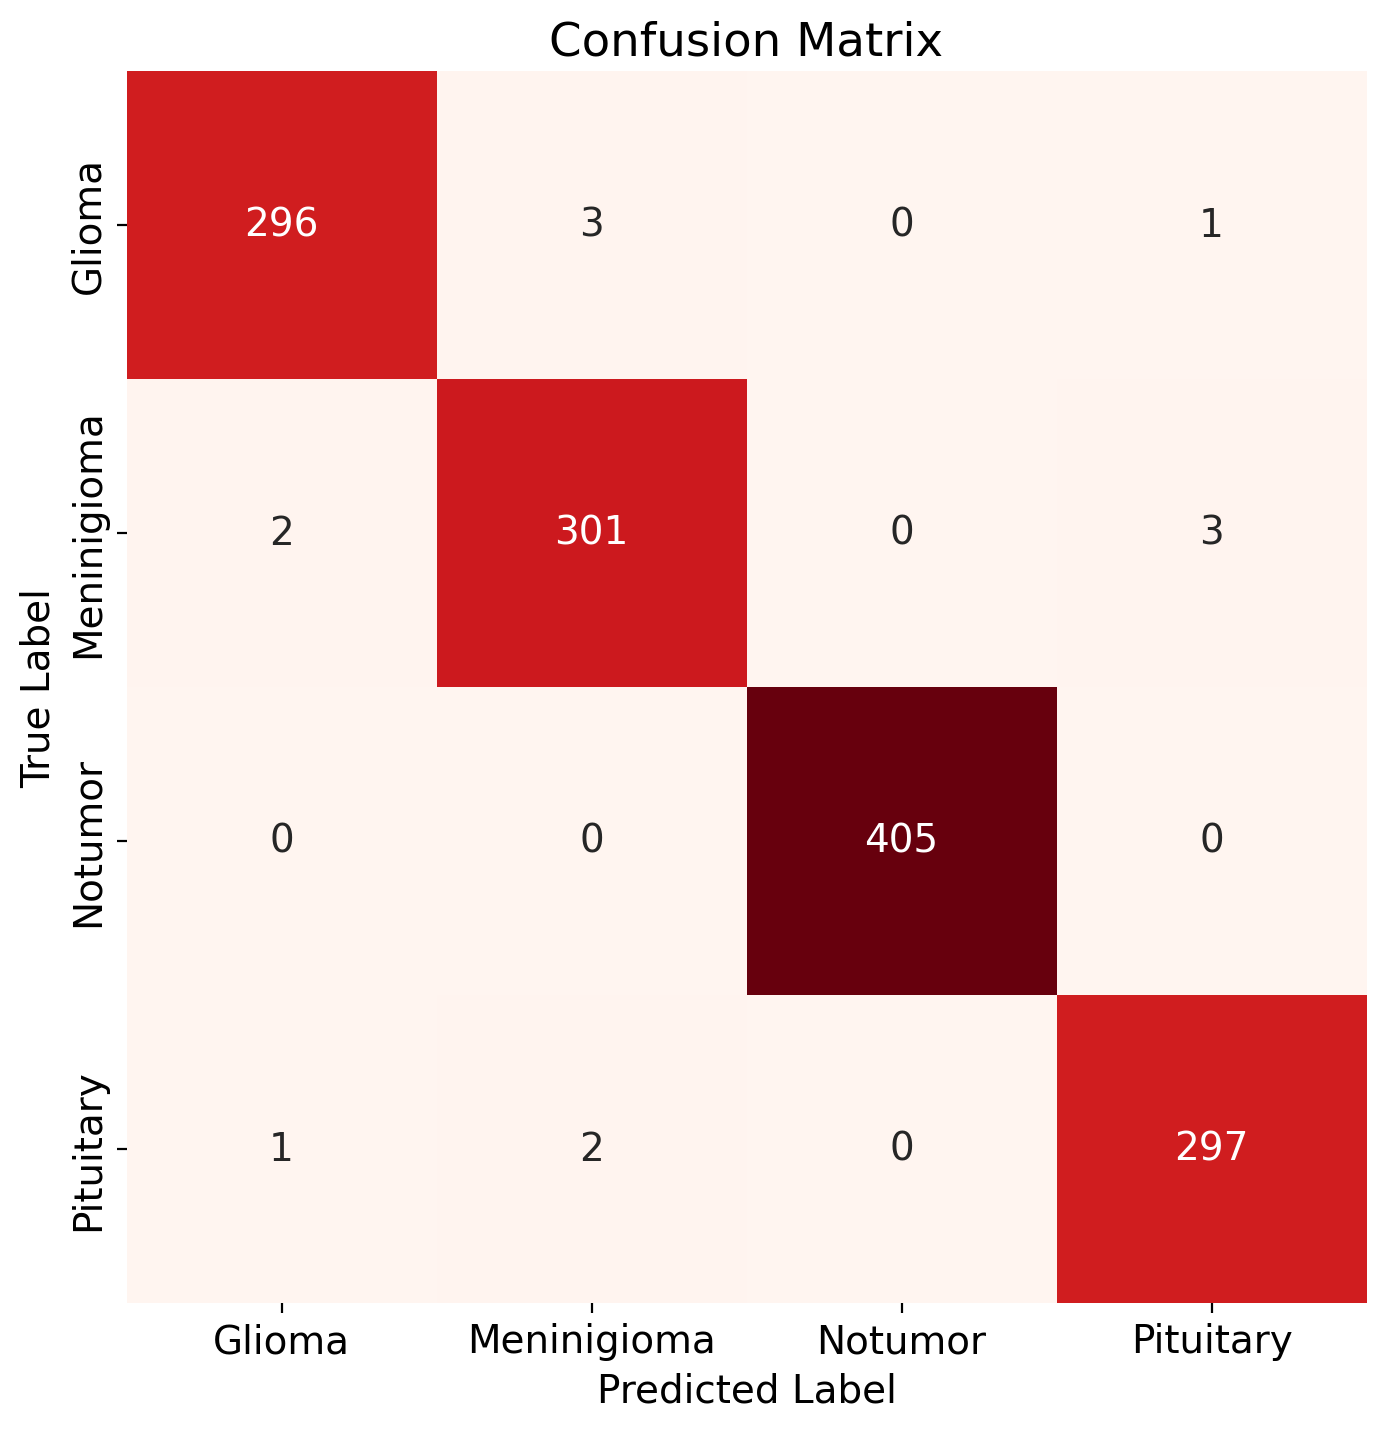


Classification Metrics:

Accuracy: 0.9908

Detailed Report:
              precision    recall  f1-score   support

      Glioma       0.99      0.99      0.99       300
 Meninigioma       0.98      0.98      0.98       306
     Notumor       1.00      1.00      1.00       405
   Pituitary       0.99      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [29]:
plot_confusion_matrix(true_labels, predicted_labels, metrics= True)

In [30]:
def plot_sample_predictions(model, dataset, num_samples=9, figsize=(13, 12)):
    plt.figure(figsize=figsize)
    num_rows = num_cols = int(np.sqrt(num_samples))

    iterator = iter(dataset.unbatch())

    for i in range(1, num_samples + 1):
        image, true_label = next(iterator)
        image_batch = tf.expand_dims(image, 0)
        predictions = model.predict(image_batch, verbose=False)
        predicted_label = np.argmax(predictions)

        true_class_index = np.argmax(true_label.numpy())
        true_class = inv_class_mapping[true_class_index]
        predicted_class = inv_class_mapping[predicted_label]

        # Determine title color based on prediction accuracy
        title_color = 'green' if true_class_index == predicted_label else 'red'

        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image.numpy().squeeze(), cmap='gray')
        plt.title(f"True: {true_class}\nPred: {predicted_class}", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [31]:
# Plottinng samples with predictions
plot_sample_predictions(model=model,
                        dataset=test_ds_preprocessed, )

Output hidden; open in https://colab.research.google.com to view.

In [34]:
def plot_misclassified_samples(model, dataset, figsize=(10, 10)):
    misclassified_images = []
    misclassified_labels = []
    misclassified_predictions = []

    # Iterate over dataset to collect misclassified images
    for image, true_label in dataset.unbatch():
        image_batch = tf.expand_dims(image, 0)
        predictions = model.predict(image_batch, verbose=False)
        predicted_label = np.argmax(predictions)
        true_class_index = np.argmax(true_label.numpy())

        if true_class_index != predicted_label:
            misclassified_images.append(image.numpy().squeeze())
            misclassified_labels.append(inv_class_mapping[true_class_index])
            misclassified_predictions.append(inv_class_mapping[predicted_label])

    # Determine number of rows and columns for subplot
    num_misclassified = len(misclassified_images)
    cols = int(np.sqrt(num_misclassified)) + 1
    rows = num_misclassified // cols + (num_misclassified % cols > 0)

    # Plotting misclassified images
    miss_classified_zip = zip(misclassified_images, misclassified_labels, misclassified_predictions)
    plt.figure(figsize=figsize)
    for i, (image, true_label, predicted_label) in enumerate(miss_classified_zip):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color='red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

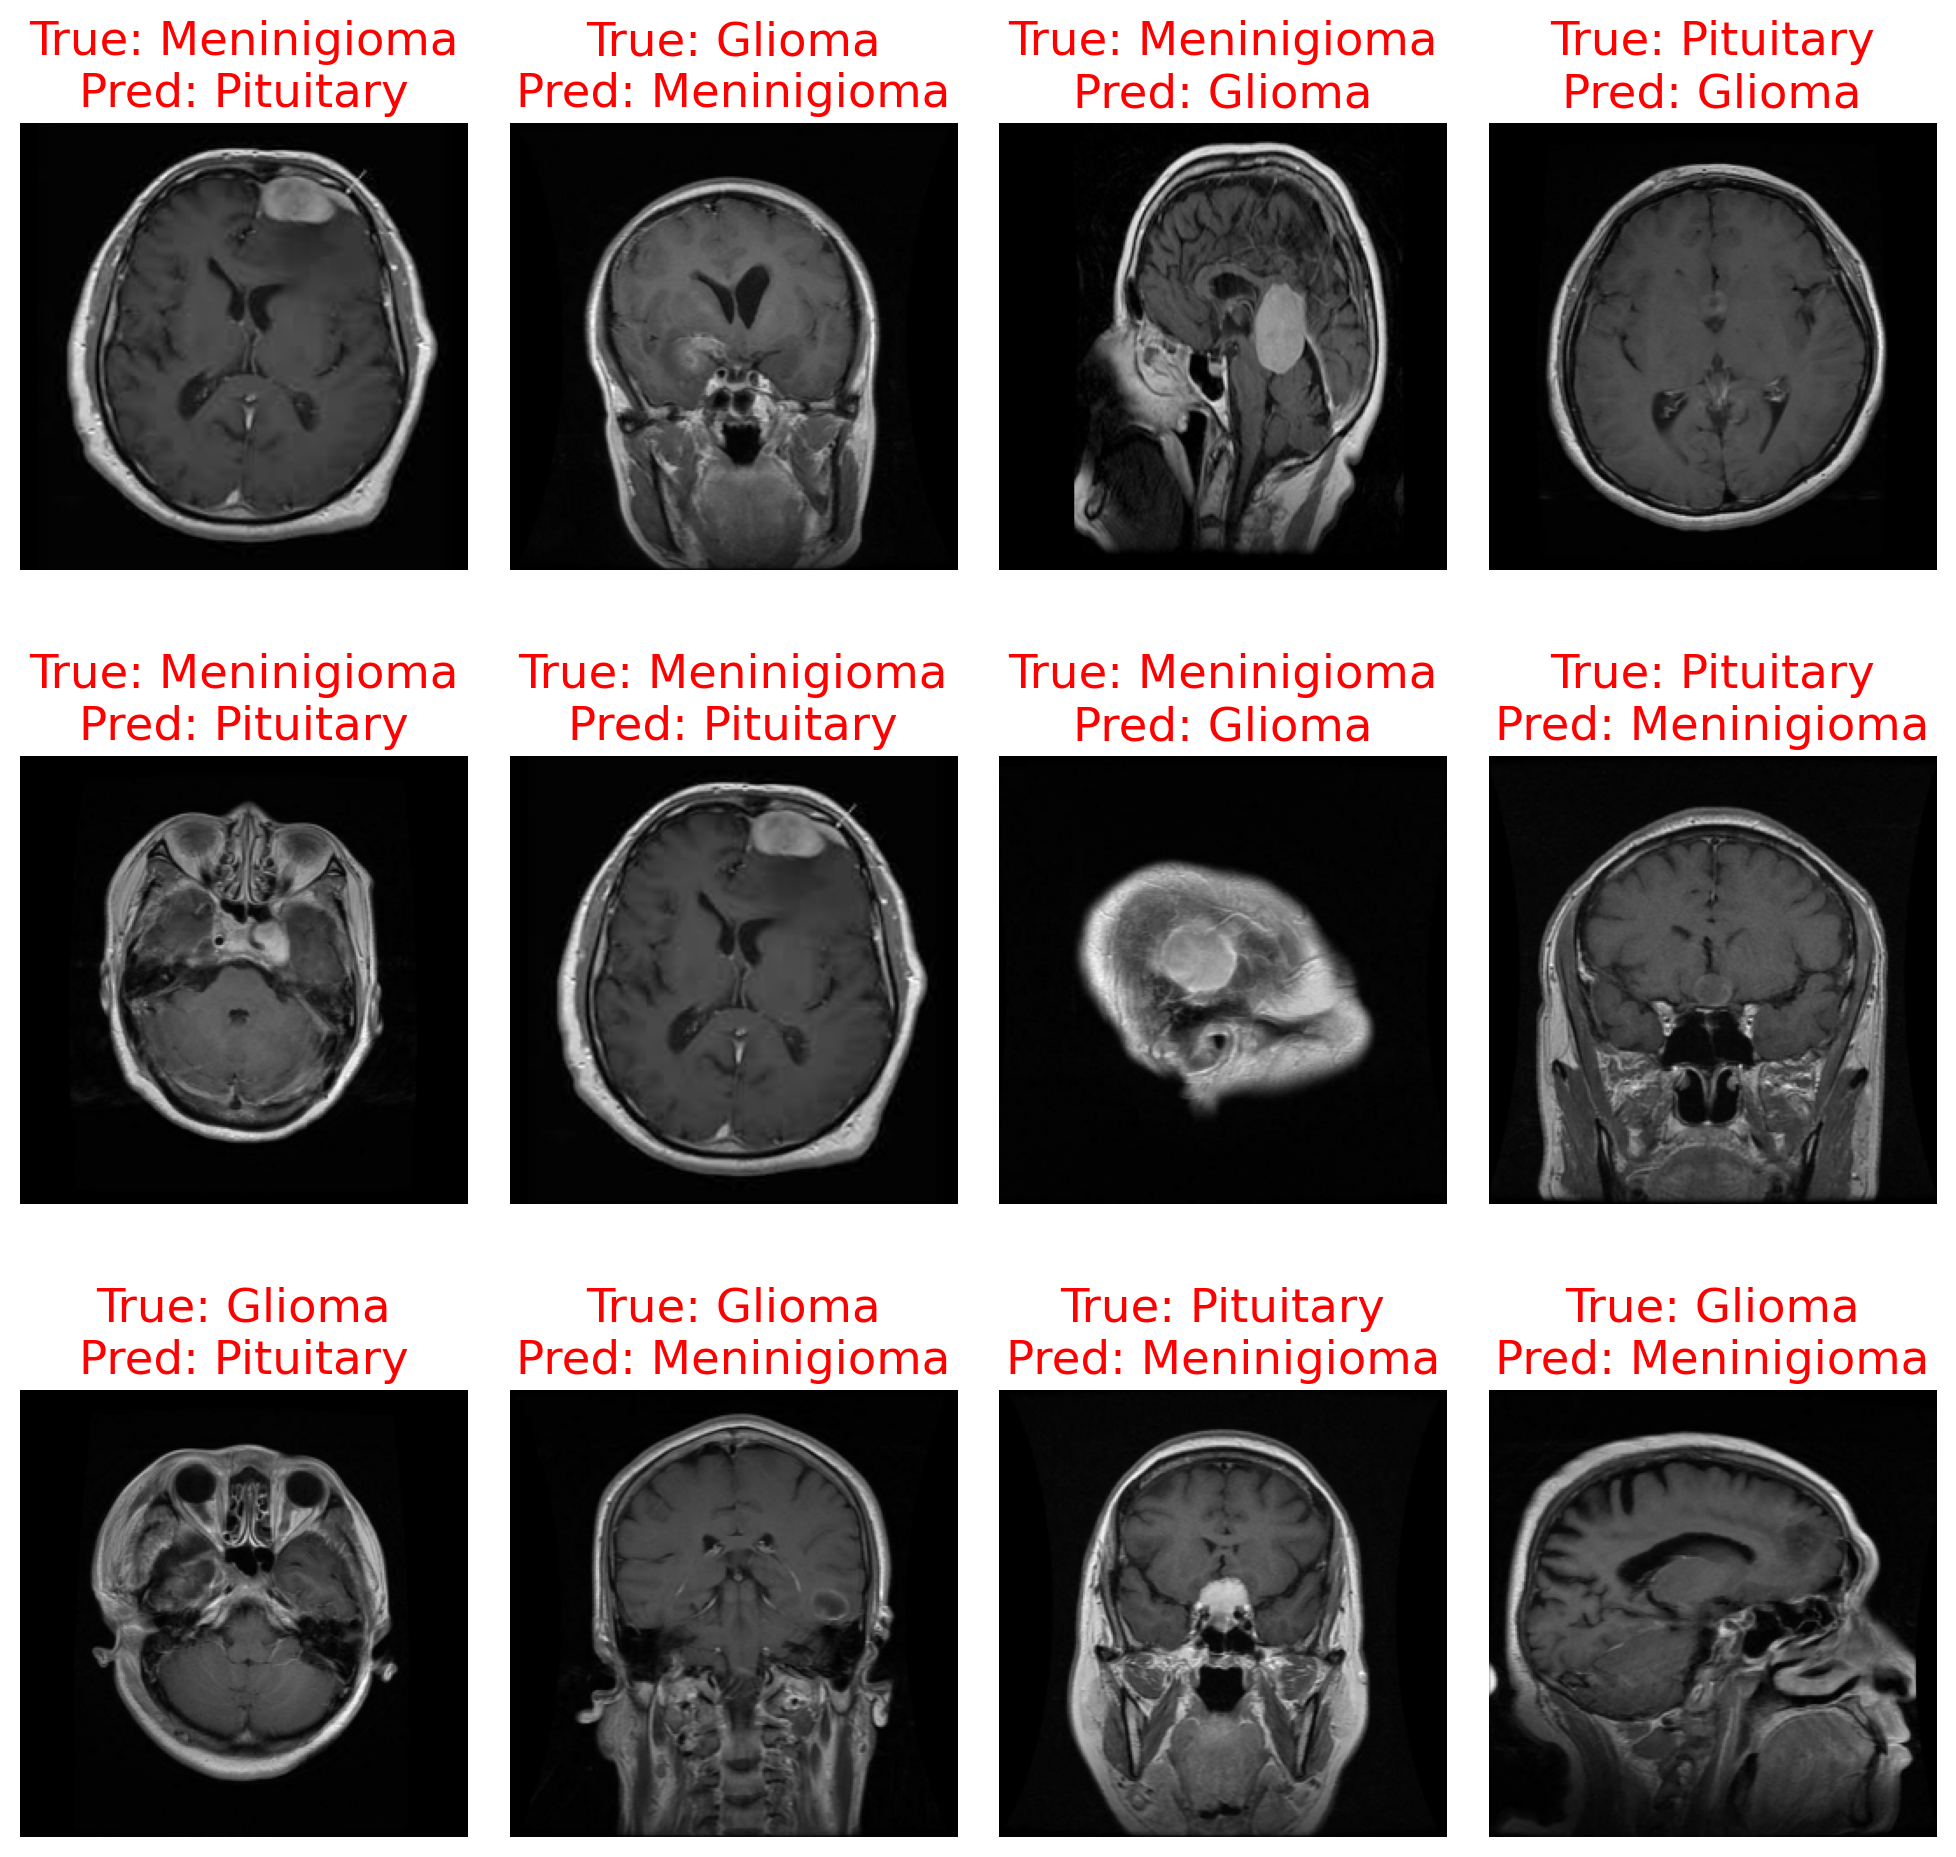

In [35]:
# Plotting misclassified images
plot_misclassified_samples(model=model,
                           dataset= test_ds_preprocessed)

<a name='7'>
    
# <div style="font-size: 120%; background-color: cyan; color: black; border-radius: 12px; padding: 25px; text-align: center; margin-bottom: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">7 | Testing on New Data 🧪</div>
    
    
[`Brain Tumor Dataset Images Used Below.`](https://www.kaggle.com/datasets/mohammadhossein77/brain-tumors-dataset)

In [37]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path, image_shape=(256, 256)):
    img = image.load_img(image_path, target_size=image_shape, color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array,0)  # Add the batch dimension
    return img_array

# Function to display a row of images with predictions
def display_images_and_predictions(image_paths, predictions, true_labels, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    for i, (image_path, prediction, true_label) in enumerate(zip(image_paths, predictions, true_labels)):
        ax = plt.subplot(1, len(image_paths), i + 1)
        img_array = load_and_preprocess_image(image_path)
        img_array = np.squeeze(img_array)
        plt.imshow(img_array, cmap='gray')
        title_color = 'green' if prediction == true_label else 'red'
        plt.title(f'True Label: {true_label}\nPred: {prediction}', color=title_color)
        plt.axis('off')
    plt.show()

In [43]:
normal_image_path ='/content/brain-tumor-mri-dataset/Testing/notumor/Te-no_0025.jpg'
glioma_image_path ='/content/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0005.jpg'
meningioma_image_path = '/content/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0093.jpg'
pituitary_tumor_path ='/content/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0107.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Class Mappings: {'Glioma': 0, 'Meninigioma': 1, 'Notumor': 2, 'Pituitary': 3}

Normal Image Prediction: [0. 0. 1. 0.]
Glioma Image Prediction: [1. 0. 0. 0.]
Meningioma Image Prediction: [0. 1. 0. 0.]
Pituitary Image Prediction: [0. 0. 0. 1.]


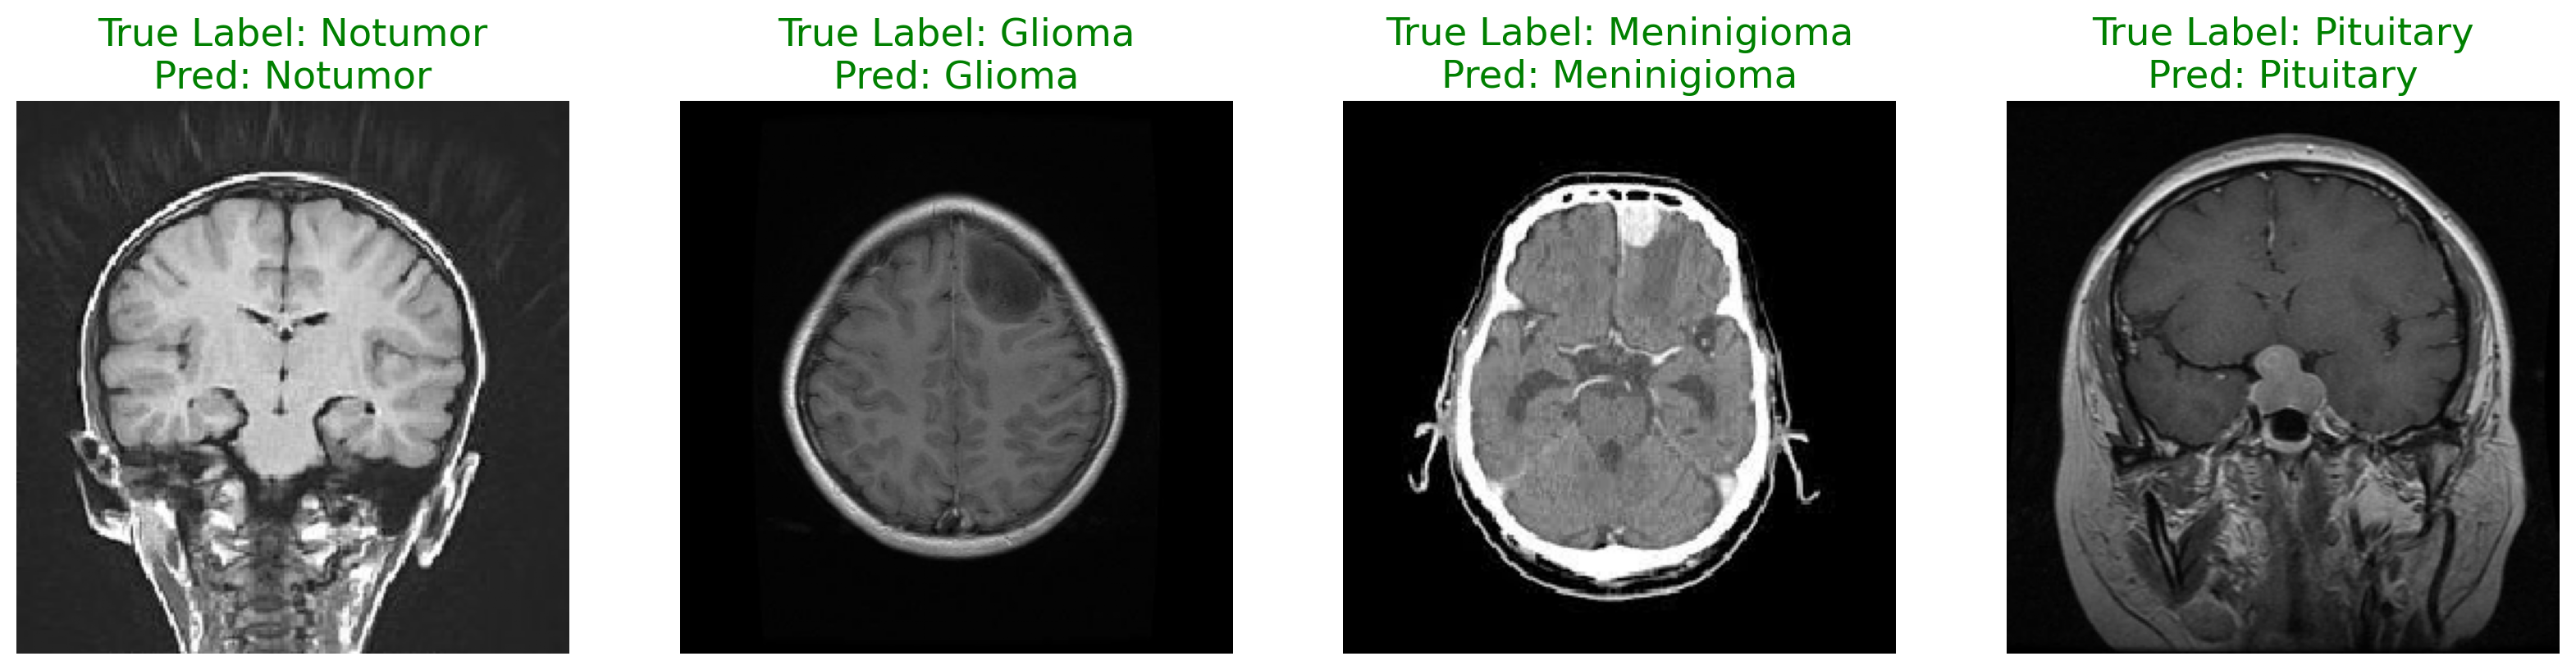

In [44]:
# Image paths
image_paths = [
    normal_image_path,
    glioma_image_path,
    meningioma_image_path,
    pituitary_tumor_path
]

# True labels for images
true_labels = ['Notumor', 'Glioma', 'Meninigioma', 'Pituitary']

# Load and preprocess images, then make predictions
images = [load_and_preprocess_image(path) for path in image_paths]
predictions = [model.predict(image) for image in images]

# Determine the predicted labels
predicted_labels = [inv_class_mapping[np.argmax(one_hot)] for one_hot in predictions]

# Output the predictions
print(f'Class Mappings: {class_mappings}')
print("\nNormal Image Prediction:", np.round(predictions[0], 3)[0])
print("Glioma Image Prediction:", np.round(predictions[1], 3)[0])
print("Meningioma Image Prediction:", np.round(predictions[2], 3)[0])
print("Pituitary Image Prediction:", np.round(predictions[3], 3)[0])

# Display images with predictions
display_images_and_predictions(image_paths, predicted_labels, true_labels)